In [1]:
from nn import *
from loss import loss_mapper
from viz import plot_history
from metrics import accuracy
from callbacks import EarlyStopping
from tools import train_test_split, load, save, binary_encoder

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('resources/data.csv', index_col=0)

In [4]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [5]:
y, ohe_map = binary_encoder(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=.33, random_state=42)

In [7]:
ohe_map

{0: 'B', 1: 'M'}

In [8]:
X_normed = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)

In [9]:
X_test_normed = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

In [20]:
model = NeuralNetwork(loss='binary_crossentropy', optimizer='gd', verbose=True, verbose_step=25)
model.add(Dense(30, activation=Relu(), dropout_rate=.25))
model.add(Dense(30, 'relu'))
model.add(Dense(1, activation=Sigmoid()))

In [21]:
es = EarlyStopping(monitor='val_loss', patience=300)

In [22]:
h = model.fit(X_normed, y_train, X_test_normed, y_test, n_epochs=1000, batch_size=32, callbacks=[es], metrics=[accuracy], reinitialize=False)

[25/1000]: loss=0.65270 val_loss=0.67145 accuracy=0.63947 val_accuracy=0.60638 
[50/1000]: loss=0.20779 val_loss=0.23352 accuracy=0.96316 val_accuracy=0.92553 
[75/1000]: loss=0.06120 val_loss=0.08636 accuracy=0.98158 val_accuracy=0.97340 
[100/1000]: loss=0.05204 val_loss=0.08506 accuracy=0.98158 val_accuracy=0.97340 
[125/1000]: loss=0.04498 val_loss=0.08998 accuracy=0.98684 val_accuracy=0.98404 
[150/1000]: loss=0.03582 val_loss=0.10113 accuracy=0.98947 val_accuracy=0.96809 
[175/1000]: loss=0.02760 val_loss=0.11730 accuracy=0.98947 val_accuracy=0.97340 
[200/1000]: loss=0.02116 val_loss=0.13699 accuracy=0.99211 val_accuracy=0.96277 
[225/1000]: loss=0.01702 val_loss=0.15569 accuracy=0.99474 val_accuracy=0.96277 
[250/1000]: loss=0.01365 val_loss=0.18058 accuracy=0.99474 val_accuracy=0.96277 
[275/1000]: loss=0.01122 val_loss=0.18841 accuracy=0.99474 val_accuracy=0.96809 
[300/1000]: loss=0.00922 val_loss=0.21062 accuracy=0.99737 val_accuracy=0.96809 
[325/1000]: loss=0.00756 val_lo

In [23]:
accuracy(y_test, model.predict(X_test_normed))

0.9627659574468085

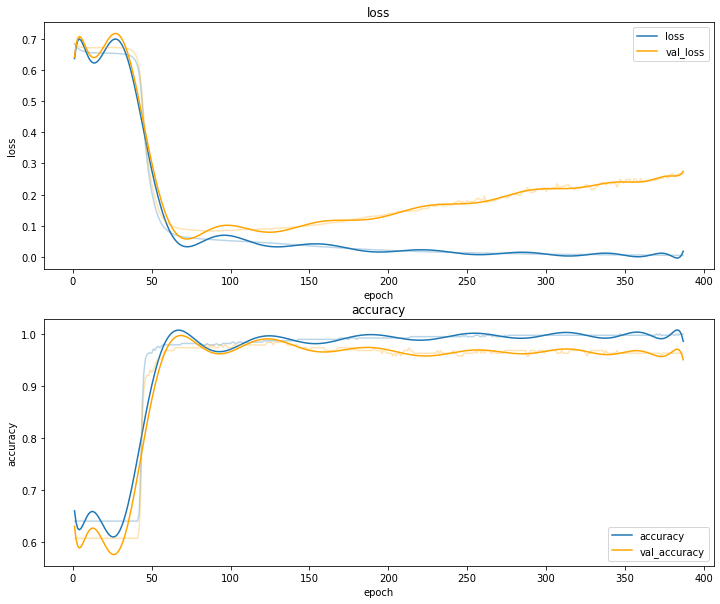

In [24]:
plot_history(h)

In [25]:
model.summary()

|Dense(30, 30, relu)              	|	930
|Dense(30, 30, relu)              	|	930
|Dense(30, 1, sigmoid)               	|	31
Total number of parameters:		 1891
Total number of trainable params:	 1891


In [26]:
from tools import load, save

save(model, 'neural_net.pcl')

In [27]:
nn = load('neural_net.pcl')

In [28]:
nn.summary()

|Dense(30, 30, relu)              	|	930
|Dense(30, 30, relu)              	|	930
|Dense(30, 1, sigmoid)               	|	31
Total number of parameters:		 1891
Total number of trainable params:	 1891


In [29]:
accuracy(y_test, nn.predict(X_test_normed))

0.9627659574468085